Larbi AABAD EL ANDALOUSSI,Zakariae AHMEDLAAZIZ, Mohammed MAAQOUL, Rayan FAIZ

#STEP O: Imports and reading Data###

In [8]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
print("Setup Complete")

Setup Complete


###Load the data

In [9]:
# Read the file into a variable iris_data
dataset = pd.read_csv("disney.csv", index_col="show_id")
# Print the first 5 rows of the data
dataset.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


#STEP 1: Data Understanding



*   shape
*   dtype
*   describe



In [10]:
dataset.shape

(1450, 11)

In [11]:
dataset.dtypes

type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [12]:
dataset.describe()

,release_year
count,1450.000000
mean,2003.091724
std,21.860162
min,1928.000000
25%,1999.000000
50%,2011.000000
75%,2018.000000
max,2021.000000


#STEP 2: Data Preparation



*   dropping irrelevent data
*   identify duplicates
*   rename columns


In [13]:
df = dataset[['title', 'type', 'release_year', 'duration', 'listed_in']]

Simplify by dropping irrelevent columns.

In [14]:
df = df.rename(columns={'title':'Title', 'type':'Type', 'release_year':'Release_year', 'duration':'Duration', 'listed_in':'Category'})

Change columns name.

In [15]:
df.isna().sum()

Title           0
Type            0
Release_year    0
Duration        0
Category        0
dtype: int64

No null data

In [16]:
df.loc[df.duplicated()]

,Title,Type,Release_year,Duration,Category
show_id,,,,,


No duplicates

#STEP 3: Aswering question

###1-Top 5 Categories:

In [17]:
AllCategories = []
for categories in dataset['listed_in']:
    AllCategories.extend(categories.split(','))
catcounts = pd.Series(AllCategories).value_counts().head(5)
print(catcounts)

 Family             612
Action-Adventure    452
 Comedy             333
Animation           320
 Animation          222
Name: count, dtype: int64


The objective of this code is to extract and count the occurrences of each category in the 'listed_in' column of the dataset. It then displays the top 5 most frequent categories.

By splitting the individual categories and counting them, the code provides a summary of the most common categories in the dataset.

###2-Top 5 directors:

In [18]:
dataset2 = dataset.dropna(subset=['director']).copy()
AllD = []
for dirr in dataset2['director']:
    AllD.extend(dirr.split(','))
cnt = pd.Series(AllD).value_counts().head(5)
print(cnt)

Jack Hannah        17
John Lasseter      16
Paul Hoen          16
Wilfred Jackson    14
Charles Nichols    12
Name: count, dtype: int64


The objective of this code is to create a new DataFrame ("dataset2") by removing the rows where the 'director' column is missing, and then count the occurrences of each director in the 'director' column of this new DataFrame.

By splitting the individual directors and counting them, the code provides a summary of the most frequent directors in the dataset after removing the rows where the 'director' column is missing.

###3-Top 10 actors:

In [19]:
disney_data = pd.read_csv('disney.csv')
disney_data['cast'] = disney_data['cast'].str.split(', ')
disney_data = disney_data.explode('cast')
actor_counts = disney_data.groupby('cast')['title'].nunique().reset_index()
sorted_actors = actor_counts.sort_values('title', ascending=False)
top_actors = sorted_actors.head(10)['cast'].tolist()
print("Top 10 actors with the most appearances in different titles:")
for actor in top_actors:
    print(actor)

Top 10 actors with the most appearances in different titles:
Jim Cummings
Walt Disney
Bill Farmer
Larry the Cable Guy 
Corey Burton
Tress MacNeille
Keith Ferguson
Jeff Bennett
Pinto Colvig
Bob Peterson


In this code, we take the data from the "cast" column.
The "disney_data.explode()" function transforms the columns into rows.
The "disney_data.groupby()" function allows us to divide the data into different groups. The ".nunique()" function returns the count of each unique value for each column. And the "reset_index()" function, as the name suggests, resets the index to 0.
Then we sort the values based on the title from largest to smallest.
Finally, we obtain the top 10 actors using the ".head(10)" function.

###4-Top 5 longest TV shows:

In [20]:
disney_data = pd.read_csv("disney.csv")
tv_shows = disney_data[disney_data["type"] == "TV Show"]
tv_shows_sorted = tv_shows.sort_values(by="duration", ascending=False)
top_tv_shows = tv_shows_sorted.head(5)
tv_show_titles = top_tv_shows["title"]
print(tv_show_titles)

553    America's Funniest Home Videos
125          Dr. K's Exotic Animal ER
557                       Brain Games
285                           Car SOS
759                   Boy Meets World
Name: title, dtype: object


In this code, we filter the data to have the series data.
Then, using the ".sort_values" function, we sort the series based on their duration from largest to smallest.
Finally, using the ".head" function, we obtain the first 5 series that have the highest number of seasons.

###5-Identifying similar content by matching textual features:

For the question: Identifying similar content by matching textual features.
You entered: 1
Films similaires à Ernest Saves Christmas :


-  The Search for Santa Paws  (Score de similarité : 31.0 % )
-  Twas the Night  (Score de similarité : 24.0 % )
-  Prep & Landing: Operation Secret Santa  (Score de similarité : 15.0 % )
-  The Santa Clause  (Score de similarité : 14.0 % )
-  My Dog, the Thief  (Score de similarité : 12.0 % )
-  Disney Holiday Magic Quest  (Score de similarité : 12.0 % )
-  Disney's Broadway Hits at London's Royal Albert Hall  (Score de similarité : 12.0 % )
-  The Legend of Mor'du  (Score de similarité : 11.0 % )
-  Mickey's Twice Upon a Christmas  (Score de similarité : 11.0 % )


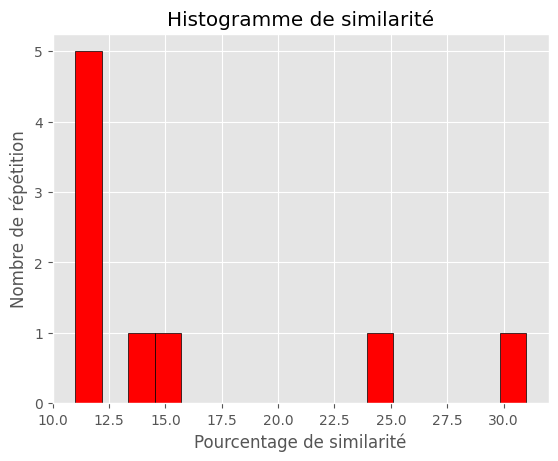

In [21]:

print("For the question: Identifying similar content by matching textual features.")

columns_needed = dataset[['title', 'description']]
result = []
dataset = dataset.fillna('')
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(dataset['description'])
mtrc = cosine_similarity(X)
movie_index = int(input("Enter an index: "))
print("You entered:", movie_index)

similar_movies = list(enumerate(mtrc[movie_index]))
sorted_similar_movies = sorted(similar_movies, key=lambda x:x[1], reverse=True)
print("Films similaires à", dataset['title'][movie_index], ":")
print("\n")
for i, sim_score in sorted_similar_movies[1:10]:
    print("- ", dataset['title'][i], " (Score de similarité :", round(sim_score*100,0),"% )")
    result.append(round(sim_score*100,0))
plt.hist(result,bins=17, edgecolor='black', color='red')

plt.title('Histogramme de similarité')
plt.xlabel('Pourcentage de similarité')
plt.ylabel('Nombre de répétition')
plt.show()

###6-Has Disney focused more on TV shows or movies the last few years?

/var/folders/l5/99jkfxnd0r9b0k3j37g50z1c0000gn/T/ipykernel_27813/938472705.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data = df, x='Release_year', y='Type', palette="Set2")
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 24.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 27.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 17.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWa

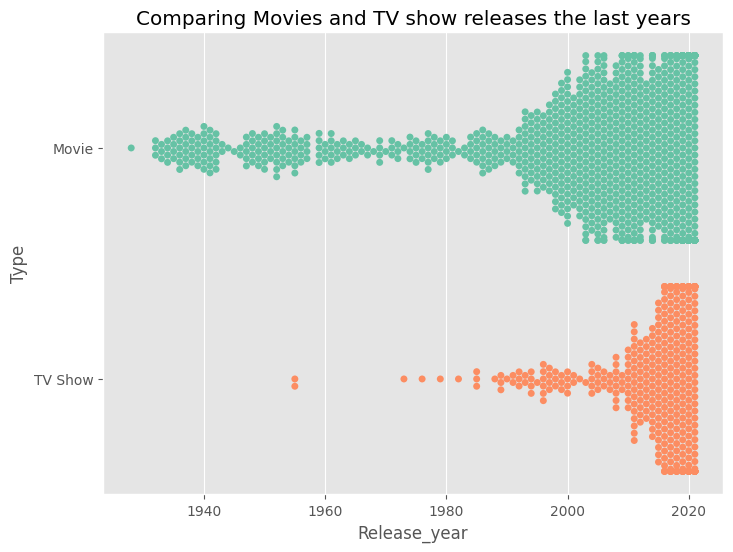

In [22]:
# Create the swarm plot
sns.swarmplot(data = df, x='Release_year', y='Type', palette="Set2")

# Set the plot title and adjust the figure size
plt.title("Comparing Movies and TV show releases the last years")
plt.gcf().set_size_inches(8, 6)

# Show the plot
plt.show()


The previous code is using the sns.swarmplot() function from the Seaborn library to create a swarm plot. A swarm plot displays the distribution of categorical data along a continuous axis. In this case it displays the distribution of the TV shows and the movies throughout the years to compare between them. We can conclude after analyzing this figure the since the 1990s the movie genre got more popular until the 2010s where TV shows took over on the Disney platform.

###BONUS:

* Data Visualization*
    - The provided code uses the Seaborn and Matplotlib libraries to create a bar chart that represents the number of Disney movies and TV shows per category.

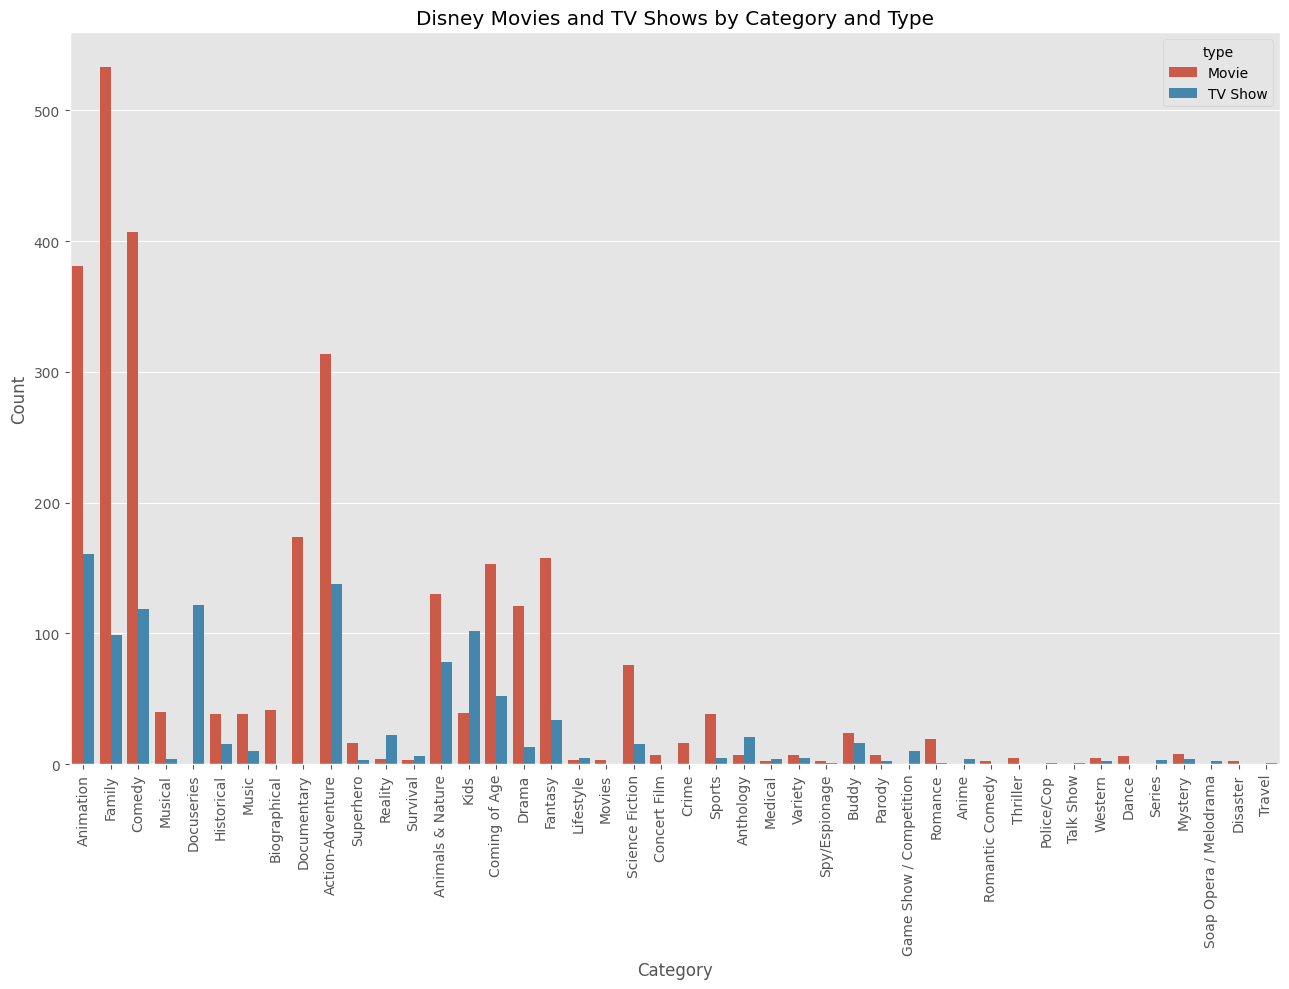

In [24]:
dataset2 = pd.read_csv('disney.csv')
categories = dataset2['listed_in'].str.split(', ').explode()
df2 = pd.DataFrame({'category': categories, 'type': dataset2['type']})
plt.figure(figsize=(13, 10))
sns.countplot(data=df2, x='category', hue='type')
plt.title('Disney Movies and TV Shows by Category and Type')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()